In [1]:
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

image (100, 75, 3)
bordes (100, 75)


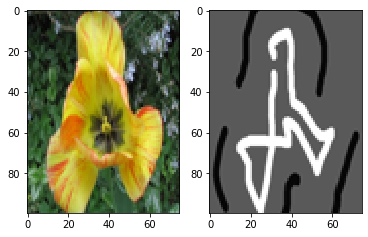

In [43]:
#image = np.array(Image.open("imagenes/images/flower.bmp"))
#bordes = np.array(Image.open("imagenes/bordes_mr/flower.bmp"))

image = Image.open("imagenes/images/flower.bmp")
image = np.array(image.resize((75,100)))
bordes = Image.open("imagenes/bordes_mr/flower.bmp")
bordes = np.array(bordes.resize((75,100)))

print('image',image.shape)
print('bordes',bordes.shape)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(bordes,cmap='gray')
plt.show()

In [3]:
# Vectorizar las imagenes
nrows,ncols,nch = image.shape
Ximage = np.reshape(image,(nrows*ncols,3))
Xbordes = np.reshape(bordes,(nrows*ncols))
print('Ximage',Ximage.shape)
print(Ximage)
print('Xbordes',Xbordes.shape)
print(Xbordes)

Ximage (120000, 3)
[[ 79  89 101]
 [ 78  91 100]
 [ 83 101 105]
 ...
 [144 180 170]
 [150 183 176]
 [160 191 186]]
Xbordes (120000,)
[128 128 128 ... 128 128 128]


In [4]:
# Separar los pixeles del objeto y del fondo
print( np.unique(Xbordes) )

Xobj = Ximage[Xbordes==255]
Xbck = Ximage[Xbordes==64]
print('Xobj',Xobj.shape)
print('Xbck',Xbck.shape)

[ 64 128 255]
Xobj (14816, 3)
Xbck (9943, 3)


[[0.78039216 0.61960784 0.20392157]
 [0.85098039 0.73333333 0.29411765]
 [0.81960784 0.75686275 0.28235294]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


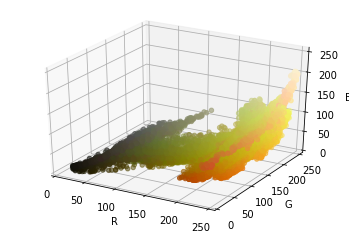

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


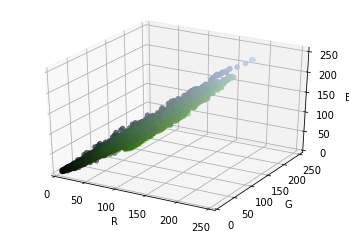

In [5]:
from mpl_toolkits.mplot3d import Axes3D

print(Xobj[:3,:]/255)

fig = plt.figure()
plt.title('Object')
ax = fig.gca(projection='3d')
R = Xobj[:,0]
G = Xobj[:,1]
B = Xobj[:,2]
ax.scatter(R, G, B, c=Xobj/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

fig = plt.figure()
plt.title('Background')
ax = fig.gca(projection='3d')
R = Xbck[:,0]
G = Xbck[:,1]
B = Xbck[:,2]
ax.scatter(R, G, B, c=Xbck/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()


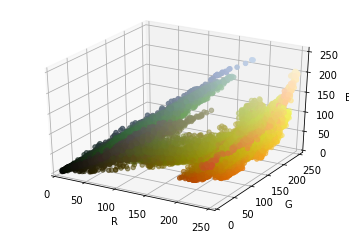

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')

R = Xobj[:,0]
G = Xobj[:,1]
B = Xobj[:,2]
ax.scatter(R, G, B, c=Xobj/255)

R = Xbck[:,0]
G = Xbck[:,1]
B = Xbck[:,2]
ax.scatter(R, G, B, c=Xbck/255)

ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

# Modelo de máquina de soporte vectorial

In [7]:
#Xtrain = [ Xobj
#           Xbck]
#ytrain = [ 1
#           0 ]
Xtrain = np.concatenate((Xobj,Xbck),axis=0)
yobj = np.ones( (len(Xobj)) )
ybck = np.zeros( (len(Xbck)) )
ytrain = np.concatenate((yobj,ybck),axis=0)
print('Xobj',Xobj.shape)
print('Xbck',Xbck.shape)
print('Xtrain',Xtrain.shape)
print('yobj',yobj.shape)
print('ybck',ybck.shape)
print('ytrain',ytrain.shape)

Xobj (14816, 3)
Xbck (9943, 3)
Xtrain (24759, 3)
yobj (14816,)
ybck (9943,)
ytrain (24759,)


In [8]:
from sklearn.svm import LinearSVC, SVC
import datetime

t1 = datetime.datetime.now()

model = LinearSVC()
model.fit(Xtrain,ytrain)
label = model.predict(Ximage)

t2 = datetime.datetime.now()
r = t2-t1
print(r.total_seconds())

0.417761


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(120000,)
(300, 400)


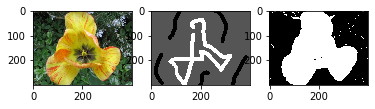

In [9]:
print(label.shape)
label = np.reshape(label,(nrows,ncols))
print(label.shape)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(image)
plt.subplot(1,3,2)
plt.imshow(bordes,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(label,cmap='gray')
plt.show()

In [10]:
# Elegir 10 imagenes
# Para cada imagen, poner resultados de
#  Regresión Logística
#  Linear SVC
#  SVC
# Poner el tiempo de entrenamiento y predicción en cada caso

## Landmarks aleatorios

In [11]:
print('Xobj',Xobj.shape,Xobj)
print('Xbck',Xbck.shape,Xobj)

Xobj (14816, 3) [[199 158  52]
 [217 187  75]
 [209 193  72]
 ...
 [202 206 132]
 [205 208 139]
 [201 206 139]]
Xbck (9943, 3) [[199 158  52]
 [217 187  75]
 [209 193  72]
 ...
 [202 206 132]
 [205 208 139]
 [201 206 139]]


In [22]:
idx = np.random.permutation(len(Xobj))[:10]
Lobj = Xobj[idx ,: ]
idx = np.random.permutation(len(Xbck))[:10]
Lbck = Xbck[idx ,: ]
Landmarks = np.concatenate((Xobj,Xbck),axis = 0)
print(Landmarks)

[[199 158  52]
 [217 187  75]
 [209 193  72]
 ...
 [ 89 130 100]
 [102 137 113]
 [ 94 127 108]]


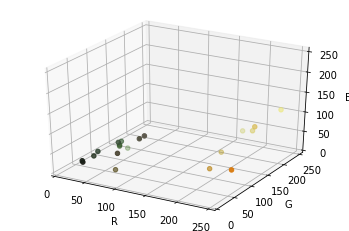

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')

R = Lobj[:,0]
G = Lobj[:,1]
B = Lobj[:,2]
ax.scatter(R, G, B, c=Lobj/255)

R = Lbck[:,0]
G = Lbck[:,1]
B = Lbck[:,2]
ax.scatter(R, G, B, c=Lbck/255)

ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

In [21]:
Xtrain = np.concatenate((Xobj,Xbck),axis=0)
yobj = np.ones( (len(Xobj)) )
ybck = np.zeros( (len(Xbck)) )
ytrain = np.concatenate((yobj,ybck),axis=0)
print('Xtrain',Xtrain.shape)

Xtrain (24759, 3)


In [37]:
n = len(Xtrain)
XtrainL = np.zeros((n,20))
#XtrainL[ sample, landkmark] = exp(-gama || sample-landmark ||^2)
#                              gama = 1/n_features

gamma = 0.001
for s in range(n):
    for l in range(20):
        sample = Xtrain[s,:]
        landmark = Landmarks[l,:]
        v = sample-landmark
        XtrainL[s,l] = np.exp(-gamma * ( np.dot(v,v) ) )

print('Xtrain',Xtrain.shape)
print('XtrainL',XtrainL.shape)
print(XtrainL)


Xtrain (24759, 3)
XtrainL (24759, 20)
[[1.         0.85384978 0.82778651 ... 0.85898828 0.83443536 0.92127196]
 [0.85384978 1.         0.89673042 ... 0.93613086 0.78270454 0.84704623]
 [0.82778651 0.89673042 1.         ... 0.93706746 0.95695396 0.97336124]
 ...
 [0.91943126 0.9665715  0.81139524 ... 0.82201223 0.85129207 0.92867169]
 [0.9970045  0.98314368 0.87109869 ... 0.87721777 0.99401796 0.81791243]
 [0.98216103 0.89942465 0.82778651 ... 0.998002   0.8478937  0.89225796]]


In [38]:
print('Ximage',Ximage.shape)
n = len(Ximage)

XimageL = np.zeros((n,20))

for s in range(n):
    for l in range(20):
        sample = Ximage[s,:]
        landmark = Landmarks[l,:]
        v = sample-landmark
        XimageL[s,l] = np.exp(-gamma* ( np.dot(v,v) ) )

print('Ximage',Ximage.shape)
print('XimageL',XimageL.shape)
print(XimageL)

Ximage (120000, 3)
Ximage (120000, 3)
XimageL (120000, 20)
[[0.94364995 0.86935824 0.86848931 ... 0.89583414 0.97141646 0.80412544]
 [0.83027359 0.79136182 0.82778651 ... 0.88514837 0.94838001 0.99004983]
 [0.94364995 0.86935824 0.91851228 ... 0.8402969  0.91851228 0.97433509]
 ...
 [0.97530991 0.9351952  0.8402969  ... 0.85470406 0.79136182 0.93706746]
 [0.7977181  0.89225796 0.94082324 ... 0.95122942 0.91851228 0.95886978]
 [0.91759423 0.7977181  0.95982913 ... 0.7756918  0.79851622 0.82695913]]


In [39]:
from sklearn.svm import LinearSVC
import datetime

t1 = datetime.datetime.now()

model = LinearSVC()
model.fit(XtrainL,ytrain)
label = model.predict(XimageL)

t2 = datetime.datetime.now()
r = t2-t1
print(r.total_seconds())

4.629702


(120000,)
(300, 400)


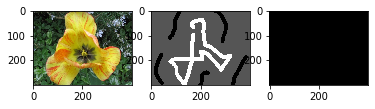

In [40]:
print(label.shape)
label = np.reshape(label,(nrows,ncols))
print(label.shape)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(image)
plt.subplot(1,3,2)
plt.imshow(bordes,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(label,cmap='gray')
plt.show()